# LoRa@FIIT- 16.4.2020


Code Rate: 4/5

Bandwidth: 125 kHz

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Načítanie uplink dát

In [3]:
uplink_data = pd.read_csv('uplink_messages.csv', delimiter=',')

Načítanie downlink dát

In [4]:
downlink_data = pd.read_csv('downlink_messages.csv', delimiter=',')

## Uplink data

In [5]:
uplink_data.head()

,id,app_data,snr,rssi,duty_cycle_remaining,is_primary,receive_time,seq,frequency,spf,power,airtime,coderate,bandwidth,msg_group_number,message_type_id,ap_id,node_id
0,193214,OTAsMTAw,9.95,-45.6,35960,t,2020-04-16 00:00:00.992,1,866100000,7,12,40,4/5,125000,52,1,111118,gfq2
1,193215,MTIzLDEwMA==,7.34,-93.6,35734,t,2020-04-16 00:00:01.975,1,866100000,10,13,266,4/5,125000,8,1,111114,m2HF
2,193216,NjUsMTAw,9.43,-84.0,35960,t,2020-04-16 00:00:05.164,1,866100000,7,8,40,4/5,125000,48,1,111120,zoRc
3,193217,OTMsMTAw,7.03,-61.8,35505,t,2020-04-16 00:00:05.625,1,866100000,11,15,495,4/5,125000,11,1,111120,gX8g
4,193218,MTQ0LDEwMA==,11.43,-79.1,35954,t,2020-04-16 00:00:05.949,1,866100000,7,5,46,4/5,125000,52,1,111112,D6TE


### Duty cycle korekcia hodnôt

In [6]:
duty_cycle_remaining = uplink_data['duty_cycle_remaining']
duty_cycle_remaining

0         35960
1         35734
2         35960
3         35505
4         35954
          ...  
206469    35960
206470    35954
206471    35960
206472    35954
206473    35954
Name: duty_cycle_remaining, Length: 206474, dtype: int64

Samotná korekcia

In [7]:
duty_cycle_data = uplink_data[uplink_data['duty_cycle_remaining'] > 3600]
duty_cycle_data = duty_cycle_data['duty_cycle_remaining'] / 10
duty_cycle_data.describe()

count    206474.000000
mean       3584.816037
std          16.466402
min        3377.700000
25%        3583.200000
50%        3588.300000
75%        3595.400000
max        3596.000000
Name: duty_cycle_remaining, dtype: float64

### Frekvencie

In [8]:
sorted(uplink_data['frequency'].unique() / 1000000)

[866.1, 866.9]

### Faktor šírenia

In [9]:
sorted(uplink_data['spf'].unique())

[7, 8, 9, 10, 11, 12]

## Analýza atribútov

### Využitie frekvenčného pásma

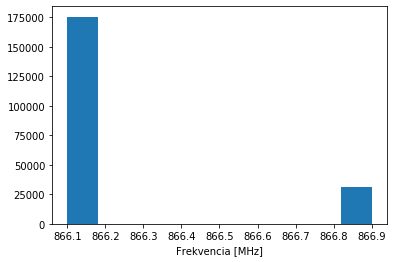

In [10]:
uplink_frequency = uplink_data['frequency'] / 1000000
plt.hist(uplink_frequency)
plt.xlabel('Frekvencia [MHz]')
plt.savefig('frequency.png')

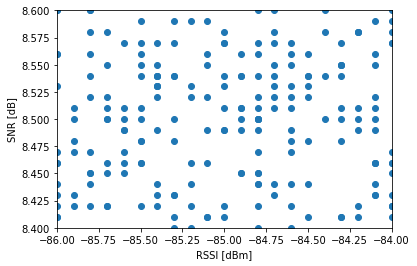

In [11]:
plt.scatter(uplink_data['rssi'], uplink_data['snr'])
plt.axis([-86,-84,8.4,8.6])
plt.xlabel('RSSI [dBm]')
plt.ylabel('SNR [dB]')
plt.savefig('frequency.png')

### Využitie LoRa prístupových bodov

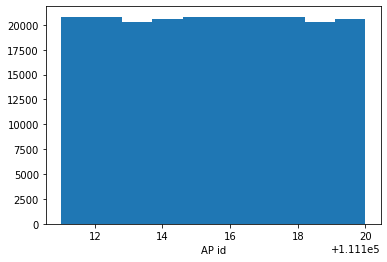

In [12]:
plt.hist(uplink_data['ap_id'])
plt.xlabel('AP id')
plt.savefig('acess_points.png')

### Trvanie prenosu

In [13]:
sorted(uplink_data['airtime'].unique())

[40, 46, 71, 82, 128, 147, 233, 266, 495, 568, 901, 1032]

### Vysielací výkon

In [14]:
sorted(uplink_data['power'].unique())

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

### Údaje o koncových zariadeniach

In [16]:
uplink_data['node_id'].describe()

count     206474
unique      5696
top         yFUC
freq          77
Name: node_id, dtype: object

## Koncové zariadenia

In [18]:
nodes_data = uplink_data['node_id'].unique()

In [19]:
uplink_data['node_id']

0         gfq2
1         m2HF
2         zoRc
3         gX8g
4         D6TE
          ... 
206469    jMsO
206470    3Aqi
206471    6tXT
206472    EAvO
206473    4QkP
Name: node_id, Length: 206474, dtype: object